#CHE 1147 Assignment 5

Name: Danmeng Cui

Student ID: 1004004356

#1. Supervised learning

Here, you are going to use the features you generated in Assignment #3 to predict the
clients response to a promotion campaign. This is a typical classification problem in the
retail industry, but the formulation of the problem is similar to industries such as fraud
detection, marketing and manufacturing.

The clients responses are stored in the Retail Data Response.csv file from Kaggle. The
responses are binary: 0 for clients who responded negatively to the promotional campaign
and 1 for clients who responded positively to the campaign.

You will explore solving the classification problem with two different sets of features (i.e.
annual and monthly) and three different algorithms as shown in the image below.


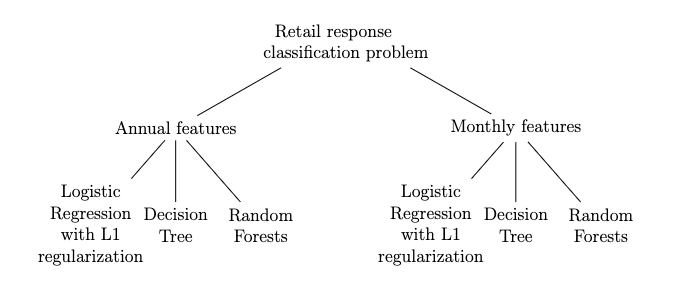

**1.1 Import the monthly and annual data and join**

In Assignment #3, you created five different feature families that capture annual and monthly
aggregations. Here, you will model the retail problem with two approaches: using annual
and monthly features. Therefore, you need to create the joined tables based on the following
logic:

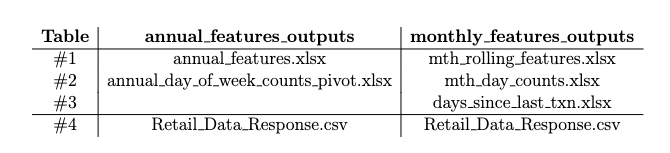

In both the annual and monthly features approach, you need to join at the end with table #4, the clients responses. This is simply a table that contains the binary response of the
client to our marketing effort as described above and that is the output or label or target
that makes this a supervised learning problem.

In [1]:
import pandas as pd

annual_features = pd.read_excel(r"/content/annual_features.xlsx")
mth_rolling_features =  pd.read_excel(r"/content/mth_rolling_features.xlsx")
annual_day_of_week_counts_pivot =  pd.read_excel(r"/content/annual_day_of_week_counts_pivot.xlsx")
mth_day_counts = pd.read_excel(r"/content/mth_day_counts.xlsx")
days_since_last_txn = pd.read_excel(r"/content/days_since_last_txn.xlsx")
Retail_Data_Response = pd.read_csv(r"/content/Retail_Data_Response.csv")


In [2]:
print(annual_features.shape, annual_day_of_week_counts_pivot.shape)
print(mth_rolling_features.shape,  mth_day_counts.shape, days_since_last_txn.shape)
print(Retail_Data_Response.shape)

(6889, 41) (6889, 36)
(323783, 23) (323783, 10) (323783, 4)
(6884, 2)


In [3]:
# annual_feature_outputs
annual_table = pd.concat([annual_features.set_index('customer_id'), annual_day_of_week_counts_pivot.set_index('customer_id')], axis = 1)
annual_features_outputs = annual_table.join(Retail_Data_Response.set_index('customer_id')).dropna()

In [4]:
#monthly_feature_outputs
month_table=pd.concat([mth_rolling_features.drop(columns=['Unnamed: 0','ME_DT']).set_index('CLNT_NO'), 
                       mth_day_counts.drop(columns=['Unnamed: 0','ME_DT']).set_index('CLNT_NO'), 
                       days_since_last_txn.drop(columns=['Unnamed: 0', 'ME_DT']).set_index('CLNT_NO')], axis = 1)
monthly_features_outputs = month_table.fillna(0).join(Retail_Data_Response.set_index('customer_id')).dropna()

**1.2 Steps for each method (10 points)**
1. Separate the inputs X and the output y in two data frames.
2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.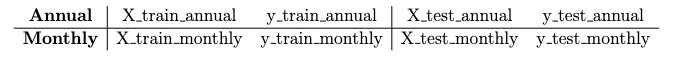

3. Pre-process (if necessary for the method).
4. Fit the training dataset and optimize the hyperparameters of the method.
5. Plot coefficient values or feature importance.
6. Plot probability distribution for test set.
7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
8. Plot decision boundary for top 2 features.


In [5]:
#Step 1: Separate the inputs X and the output y in two data frames.
X_annual=annual_features_outputs.drop(columns=['response'])
X_monthly=monthly_features_outputs.drop(columns=['response'])
y_annual=annual_features_outputs['response']
y_monthly=monthly_features_outputs['response']

In [6]:
#Step 2: Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147 for consistency (i.e. the course code value). 
#Use the following names for consistency.
from sklearn.model_selection import train_test_split
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size = 2/3, random_state = 1147)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size = 2/3, random_state = 1147)

#Logistic Regression
*Logistic Regression Algorithm with L1 Regularization for Annual*

In [80]:
#Step 3: Pre-process (if necessary for the method).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_test_annual_scaled = scaler.transform(X_test_annual)

In [81]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
LogReg1 = LogisticRegression()
LogReg1.fit(X_train_annual_scaled, y_train_annual)
y_test_annual_predicted=LogReg1.predict(X_test_annual_scaled)
print('The test Accuracy Score for the Linear Regression Algorithm for Annual data is:', accuracy_score(y_test_annual, y_test_annual_predicted)*100,'%')

#Hyperparameter tuning
c = [10, 1, 0.1, 0.01, 0.001]
for i in c:
    model1= LogisticRegression(solver='liblinear', penalty='l1',C=i)
    model1.fit(X_train_annual_scaled, y_train_annual)
    y_train_annual_predicted=model1.predict(X_train_annual_scaled)
    y_test_annual_predicted=model1.predict(X_test_annual_scaled)
    print('When C is:', i,':')
    print('The Accuracy Score for training is:', accuracy_score(y_train_annual, y_train_annual_predicted)*100,'%')
    print('The Accuracy Score for testing is:', accuracy_score(y_test_annual, y_test_annual_predicted)*100,'%')
    print('The Recall Score for training is:', recall_score(y_train_annual, y_train_annual_predicted)*100,'%')
    print('The Recall Score for testing is:', recall_score(y_test_annual, y_test_annual_predicted)*100,'%')
    print('---------------------------------------')

#Fit the best hyperparameter
model_annual_lr = LogisticRegression(solver = "liblinear", penalty = "l1",C = 10)
model_annual_lr.fit(X_train_annual_scaled, y_train_annual)

The test Accuracy Score for the Linear Regression Algorithm for Annual data is: 89.58605664488017 %
When C is: 10 :
The Accuracy Score for training is: 91.8918918918919 %
The Accuracy Score for testing is: 89.62962962962962 %
The Recall Score for training is: 10.714285714285714 %
The Recall Score for testing is: 2.6607538802660753 %
---------------------------------------
When C is: 1 :
The Accuracy Score for training is: 91.76111595466435 %
The Accuracy Score for testing is: 89.69498910675381 %
The Recall Score for training is: 7.653061224489796 %
The Recall Score for testing is: 1.5521064301552108 %
---------------------------------------
When C is: 0.1 :
The Accuracy Score for training is: 91.58674803836094 %
The Accuracy Score for testing is: 89.93464052287582 %
The Recall Score for training is: 2.5510204081632653 %
The Recall Score for testing is: 0.8869179600886918 %
---------------------------------------
When C is: 0.01 :
The Accuracy Score for training is: 91.45597210113338 %


LogisticRegression(C=10, penalty='l1', solver='liblinear')

The highest recall score for testing set is 2.6607538802660753%, when C is 10, the recall score is optimized. 

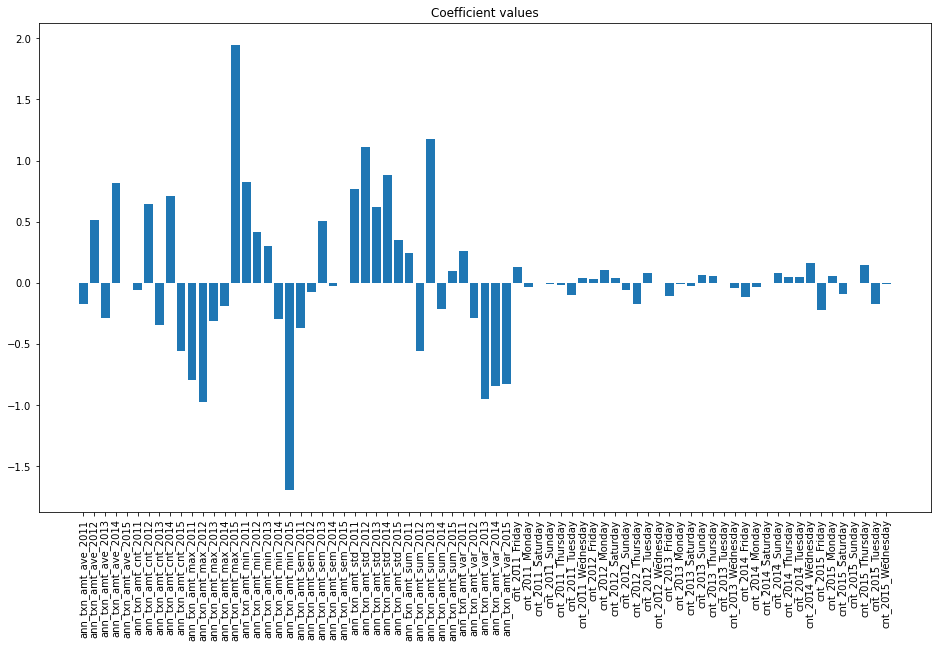

In [82]:
#Sterp 5: Plot coefficient values or feature importance.
import matplotlib.pyplot as plt
m = model_annual_lr.coef_
plt.figure(figsize=(16,9))
plt.title("Coefficient values")
plt.bar(range(X_annual.shape[1]), m[0])
plt.xticks(range(X_annual.shape[1]), X_annual.columns, rotation=90)
plt.show()

Text(3.799999999999997, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

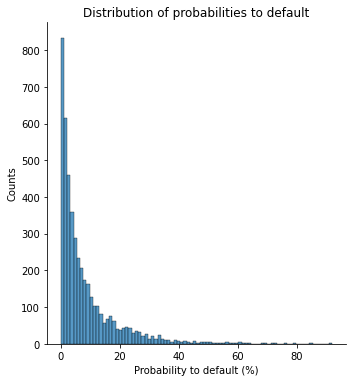

In [83]:
#Step 6: Plot probability distribution for test set.
import seaborn as sns
import numpy as np
y_test_annual_proba = model_annual_lr.predict_proba(X_test_annual_scaled)[:,1] 
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_annual_proba)
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

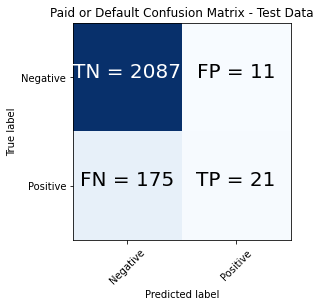

In [11]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
from sklearn.metrics import confusion_matrix
#Train Confusion Matrix
model_annual_lr_predicted_train=model_annual_lr.predict(X_train_annual_scaled)
cm_train = confusion_matrix(y_train_annual, model_annual_lr_predicted_train)

plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

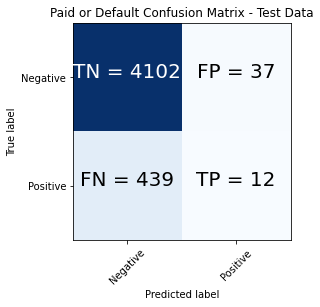

In [12]:
#Test Confusion Matrix
model_annual_lr_predicted_test=model_annual_lr.predict(X_test_annual_scaled)
cm_test = confusion_matrix(y_test_annual, model_annual_lr_predicted_test)

plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

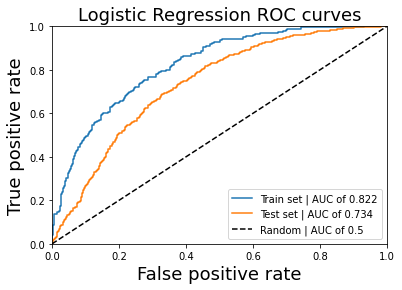

In [13]:
#ROC  
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = model_annual_lr.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = model_annual_lr.predict_proba(X_test_annual_scaled)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistic Regression ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_lr_annual = precision_score(y_test_annual, model_annual_lr_predicted_test)
recall_lr_annual = recall_score(y_test_annual, model_annual_lr_predicted_test)
print('The precision Score for the annual testing is:', precision_lr_annual*100,'%')
print('The recall Score for the annual testing is:', recall_lr_annual*100,'%')

The precision Score for the annual testing is: 24.489795918367346 %
The recall Score for the annual testing is: 2.6607538802660753 %


In [17]:
#Step 8: Plot decision boundary for top 2 features.
features_annual=pd.DataFrame(data=m.reshape(-1,1),columns=['importance'])
print(features_annual.sort_values(by=['importance'], ascending=False).iloc[0:2,:])
print('The top 2 features are', annual_table.columns[14],'&',annual_table.columns[32])

xx, yy = np.mgrid[0:14:1.4, 0:32:3.2] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_annual_scaled.shape[1])) * np.median(X_train_annual_scaled, axis=0) 
median_inputs[:,14] = grid[:,0]
median_inputs[:,32] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

    importance
14    1.947579
32    1.173158
The top 2 features are ann_txn_amt_max_2015 & ann_txn_amt_sum_2013


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.0,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.0,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
1,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.0,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,3.2,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
2,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.0,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,6.4,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
3,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.0,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,9.6,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
4,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.0,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,12.8,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

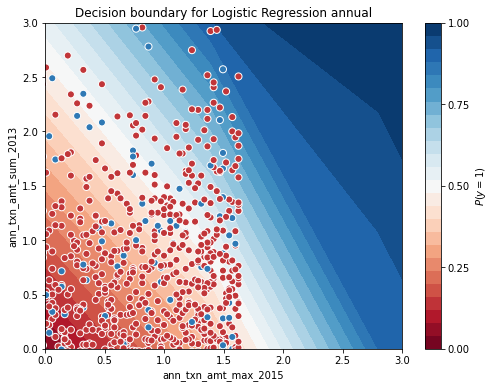

In [18]:
probs = model_annual_lr.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_annual_scaled[50:,14], X_train_annual_scaled[50:, 32], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 3), ylim=(0, 3),
       xlabel="ann_txn_amt_max_2015", ylabel="ann_txn_amt_sum_2013")
plt.title("Decision boundary for Logistic Regression annual")
plt.show()

*Logistic Regression Algorithm with L1 Regularization for Monthly*

In [19]:
#Step 3: Pre-process (if necessary for the method).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler.transform(X_test_monthly)

In [20]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
LogRega = LogisticRegression()
LogRega.fit(X_train_monthly_scaled, y_train_monthly)
y_test_monthly_predicted=LogRega.predict(X_test_monthly_scaled)
print('The test Accuracy Score for the Linear Regression Algorithm for Monthly data is:', accuracy_score(y_test_monthly, y_test_monthly_predicted)*100,'%')

#Hyperparameter tuning
c = [10, 1, 0.1, 0.01, 0.001]
for i in c:
    modela= LogisticRegression(solver='liblinear', penalty='l1',C=i)
    modela.fit(X_train_monthly_scaled, y_train_monthly)
    y_train_monthly_predicted=modela.predict(X_train_monthly_scaled)
    y_test_monthly_predicted=modela.predict(X_test_monthly_scaled)
    print('When C is:', i,':')
    print('The Accuracy Score for training is:', accuracy_score(y_train_monthly, y_train_monthly_predicted)*100,'%')
    print('The Accuracy Score for testing is:', accuracy_score(y_test_monthly, y_test_monthly_predicted)*100,'%')
    print('The Recall Score for training is:', recall_score(y_train_monthly, y_train_monthly_predicted)*100,'%')
    print('The Recall Score for testing is:', recall_score(y_test_monthly, y_test_monthly_predicted)*100,'%')
    print('---------------------------------------')

#Fit the best hyperparameter
model_monthly_lr = LogisticRegression(solver = "liblinear", penalty = "l1",C = 10)
model_monthly_lr.fit(X_train_monthly_scaled, y_train_monthly)

The test Accuracy Score for the Linear Regression Algorithm for Monthly data is: 90.58780986467254 %
When C is: 10 :
The Accuracy Score for training is: 90.62856401079287 %
The Accuracy Score for testing is: 90.58780986467254 %
The Recall Score for training is: 0.0 %
The Recall Score for testing is: 0.0 %
---------------------------------------
When C is: 1 :
The Accuracy Score for training is: 90.62856401079287 %
The Accuracy Score for testing is: 90.58780986467254 %
The Recall Score for training is: 0.0 %
The Recall Score for testing is: 0.0 %
---------------------------------------
When C is: 0.1 :
The Accuracy Score for training is: 90.62856401079287 %
The Accuracy Score for testing is: 90.58780986467254 %
The Recall Score for training is: 0.0 %
The Recall Score for testing is: 0.0 %
---------------------------------------
When C is: 0.01 :
The Accuracy Score for training is: 90.62856401079287 %
The Accuracy Score for testing is: 90.58780986467254 %
The Recall Score for training is

LogisticRegression(C=10, penalty='l1', solver='liblinear')

The recall scores are all 0, accuracy scores for each of the C values are the same. Therefore, the hyperparameter C has no impact on the accuracy and recall scores. 

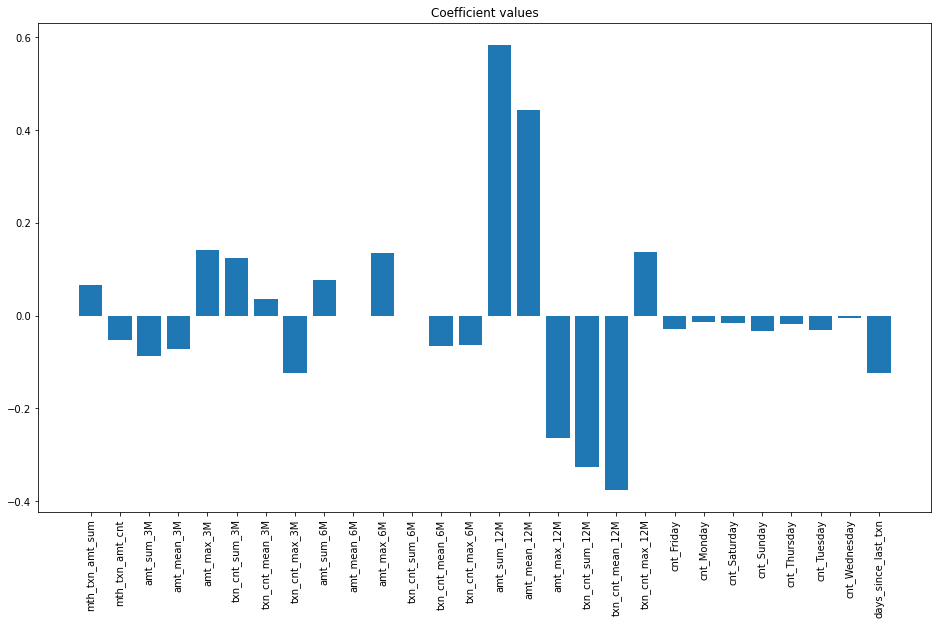

In [21]:
#Sterp 5: Plot coefficient values or feature importance.
import matplotlib.pyplot as plt
m = model_monthly_lr.coef_
plt.figure(figsize=(16,9))
plt.title("Coefficient values")
plt.bar(range(X_monthly.shape[1]), m[0])
plt.xticks(range(X_monthly.shape[1]), X_monthly.columns, rotation=90)
plt.show()

Text(-2.450000000000003, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

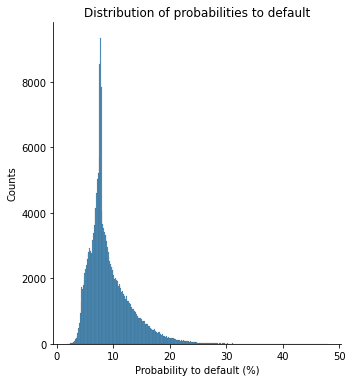

In [22]:
#Step 6: Plot probability distribution for test set.
import seaborn as sns
import numpy as np
y_test_monthly_proba = model_monthly_lr.predict_proba(X_test_monthly_scaled)[:,1] 
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_monthly_proba)
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

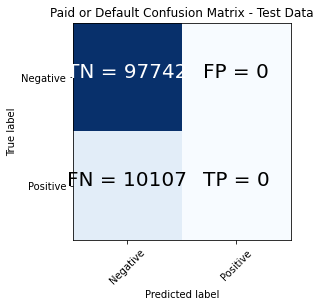

In [23]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
from sklearn.metrics import confusion_matrix
#Train Confusion Matrix
model_monthly_lr_predicted_train=model_monthly_lr.predict(X_train_monthly_scaled)
cm_train = confusion_matrix(y_train_monthly, model_monthly_lr_predicted_train)

plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

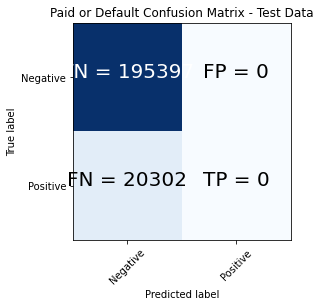

In [24]:
#Test Confusion Matrix
model_monthly_lr_predicted_test=model_monthly_lr.predict(X_test_monthly_scaled)
cm_test = confusion_matrix(y_test_monthly, model_monthly_lr_predicted_test)

plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

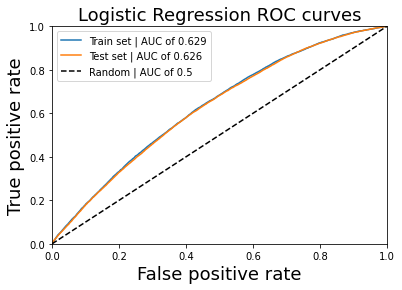

In [25]:
#ROC  
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = model_monthly_lr.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = model_monthly_lr.predict_proba(X_test_monthly_scaled)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistic Regression ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_lr_monthly = precision_score(y_test_monthly, model_monthly_lr_predicted_test)
recall_lr_monthly = recall_score(y_test_monthly, model_monthly_lr_predicted_test)
print('The precision Score for the monthly testing is:', precision_lr_monthly*100,'%')
print('The recall Score for the monthly testing is:', recall_lr_monthly*100,'%')

The precision Score for the monthly testing is: 0.0 %
The recall Score for the monthly testing is: 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Step 8: Plot decision boundary for top 2 features.
features_monthly=pd.DataFrame(data=m.reshape(-1,1),columns=['importance'])
print(features_monthly.sort_values(by=['importance'], ascending=False).iloc[0:2,:])
print('The top 2 features are', month_table.columns[15],'&',month_table.columns[14])

xx, yy = np.mgrid[0:14:1.4, 0:15:1.5] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_monthly_scaled.shape[1])) * np.median(X_train_monthly_scaled, axis=0) 
median_inputs[:,15] = grid[:,0]
median_inputs[:,14] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

    importance
14    0.583543
15    0.443361
The top 2 features are amt_mean_12M & amt_sum_12M


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
1,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,1.5,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
2,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,3.0,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
3,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,4.5,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
4,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,6.0,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,7.5,12.6,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
96,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,9.0,12.6,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
97,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,10.5,12.6,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
98,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,12.0,12.6,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656


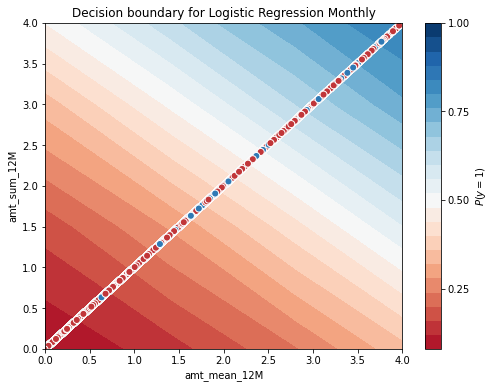

In [28]:
probs = model_monthly_lr.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly_scaled[50:,15], X_train_monthly_scaled[50:, 14], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 4), ylim=(0, 4),
       xlabel="amt_mean_12M", ylabel="amt_sum_12M")
plt.title("Decision boundary for Logistic Regression Monthly")
plt.show()

#Decision Tree

*Decision Tree Algorithm  for Annual*

In [29]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.tree import DecisionTreeClassifier
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 8)
estimator_max_depth = []
accuracy_normalized = []
auc_train= []
auc_test= []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(X_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_annual)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has featu

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.174292,0.700504,0.678205,1
1,90.174292,0.736396,0.697802,2
2,90.174292,0.762659,0.704718,3
3,60.283224,0.792137,0.721851,4
4,10.566449,0.835687,0.732913,5
5,62.941176,0.869209,0.691296,6
6,13.311547,0.896951,0.689184,7


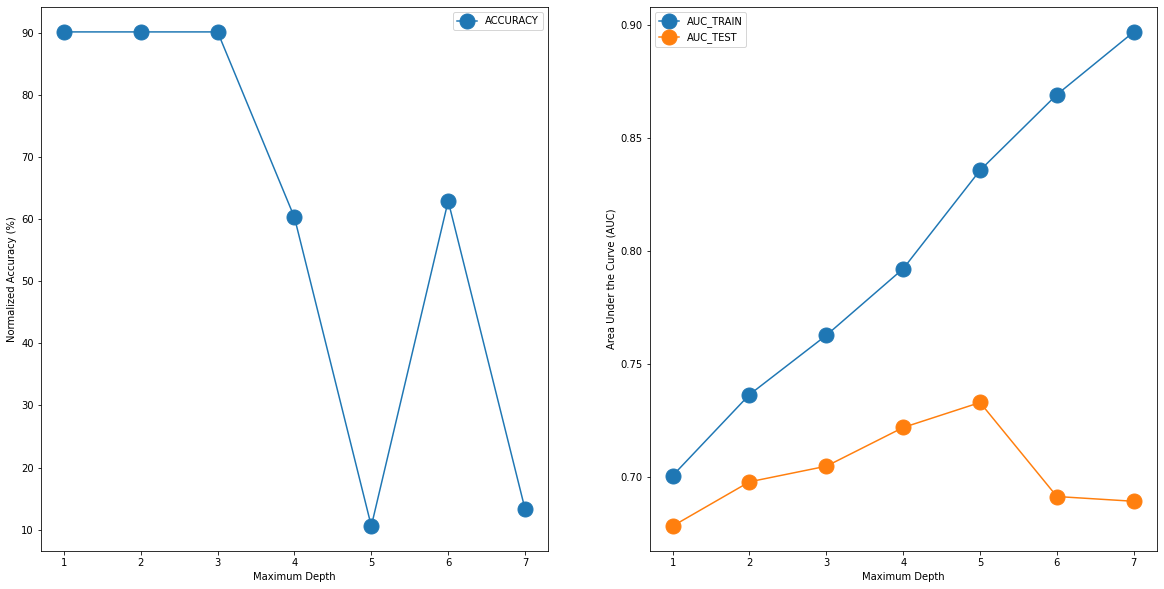

In [30]:
fig_1 = plt.figure(figsize=(20,10))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

The highest AUC occurs at Depth of 5, however, the accuracy is too low for depth 5. We will select depth of 3, which has a high accuracy and relative high AUC. 

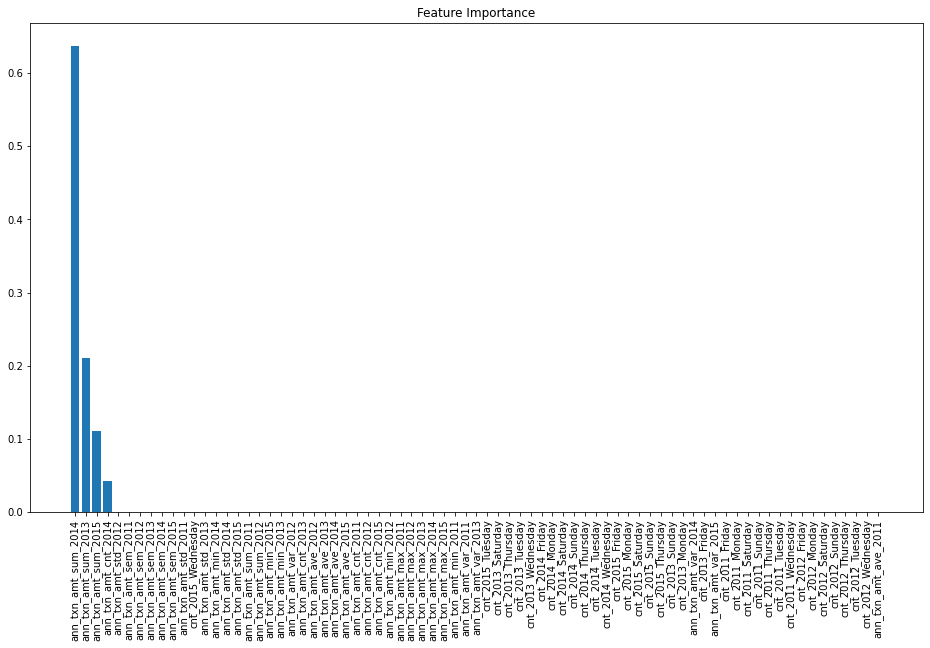

In [31]:
#Sterp 5: Plot coefficient values or feature importance.
import matplotlib.pyplot as plt
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 3)
model_dt_annual  = estimator.fit(X_train_annual_scaled, y_train_annual)
# Calculate feature importances
importances = model_dt_annual.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_annual.columns[i] for i in indices]
plt.figure(figsize=(16,9))
plt.title("Feature Importance")
plt.bar(range(X_annual.shape[1]), importances[indices])
plt.xticks(range(X_annual.shape[1]), names, rotation=90)
plt.show()

Text(-2.700000000000003, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

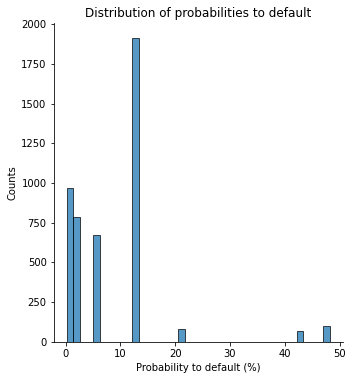

In [32]:
#Step 6: Plot probability distribution for test set.
y_test_proba = model_dt_annual.predict_proba(X_test_annual_scaled)
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

[[2098    0]
 [ 196    0]]


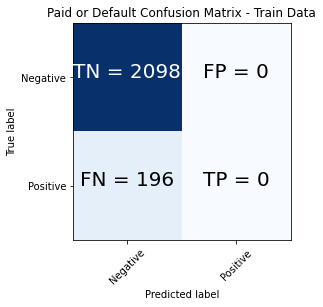

In [33]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
#ROC for train
from sklearn.metrics import confusion_matrix
model_annual_dt_predicted_train=model_dt_annual.predict(X_train_annual_scaled)
cm_train = confusion_matrix(y_train_annual, model_annual_dt_predicted_train)
print(cm_train)
plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

[[4139    0]
 [ 451    0]]


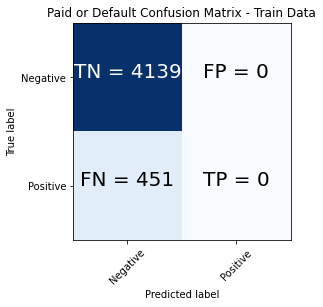

In [34]:
#ROC for Test
from sklearn.metrics import confusion_matrix
model_annual_dt_predicted_test=model_dt_annual.predict(X_test_annual_scaled)
cm_test= confusion_matrix(y_test_annual, model_annual_dt_predicted_test)
print(cm_test)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

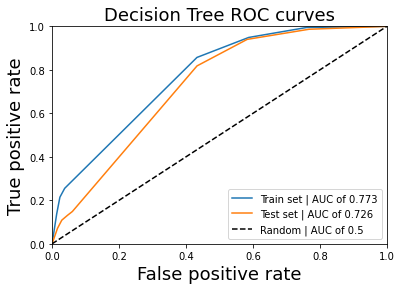

In [35]:
# Scores for train set
scores_train = model_dt_annual.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = model_dt_annual.predict_proba(X_test_annual_scaled)[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_dt_annual = precision_score(y_test_annual, model_annual_dt_predicted_test)
recall_dt_annual = recall_score(y_test_annual, model_annual_dt_predicted_test)
print('The precision Score for the annual testing is:', precision_dt_annual*100,'%')
print('The recall Score for the annual testing is:', recall_dt_annual*100,'%')

The precision Score for the annual testing is: 0.0 %
The recall Score for the annual testing is: 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#Step 8: Plot decision boundary for top 2 features.
print('The top 2 features are', X_annual.columns[indices[0]],'&',X_annual.columns[indices[1]])

xx, yy = np.mgrid[0:33:3.3, 0:32:3.2] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_annual_scaled.shape[1])) * np.median(X_train_annual_scaled, axis=0) 
median_inputs[:,33] = grid[:,0]
median_inputs[:,32] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

The top 2 features are ann_txn_amt_sum_2014 & ann_txn_amt_sum_2013


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.0,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
1,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,3.2,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
2,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,6.4,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
3,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,9.6,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
4,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,12.8,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

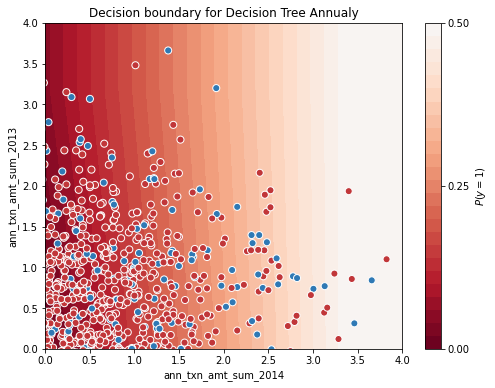

In [38]:
probs = model_dt_annual.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_annual_scaled[50:,33], X_train_annual_scaled[50:, 32], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 4), ylim=(0, 4),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_amt_sum_2013")
plt.title("Decision boundary for Decision Tree Annualy")
plt.show()

*Decision Tree Algorithm for Monthly*

In [39]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.tree import DecisionTreeClassifier
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 8)
estimator_max_depth = []
accuracy_normalized = []
auc_train= []
auc_test= []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(X_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_monthly)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has featu

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.587810,0.593919,0.588524,1
1,90.587810,0.619111,0.614346,2
2,90.587810,0.632854,0.628497,3
3,90.555821,0.640573,0.634434,4
4,90.568338,0.644406,0.636120,5
5,90.531250,0.648786,0.636833,6
6,71.763430,0.654698,0.635879,7


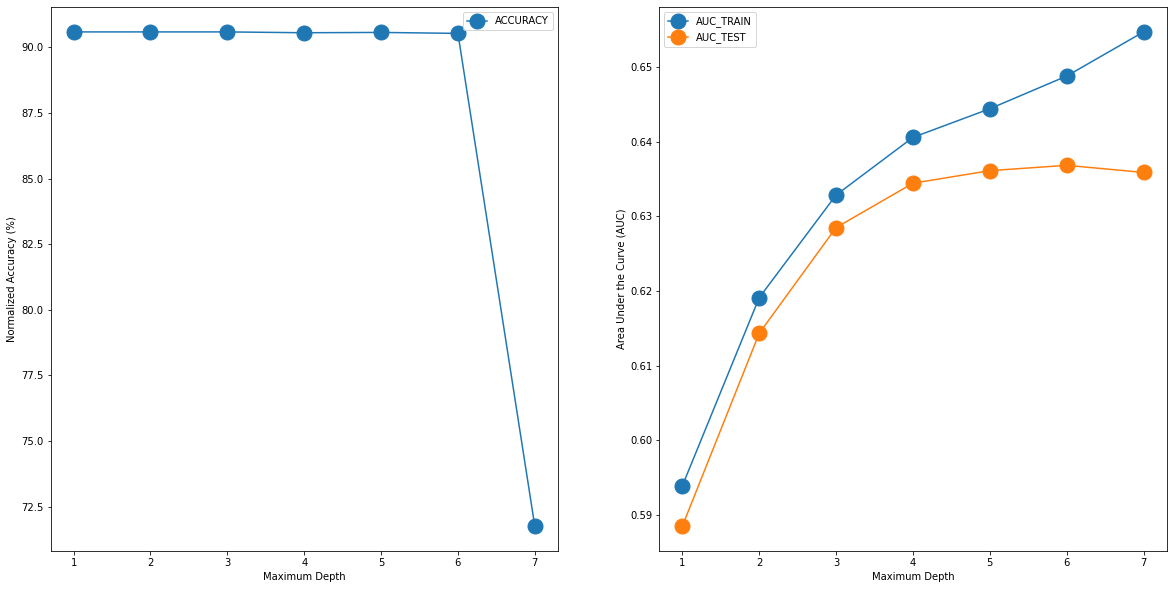

In [40]:
fig_1 = plt.figure(figsize=(20,10))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

Depth of 5 has high AUC and high Accuracy scores, therefore, we will pick 5 for the monthly data. 

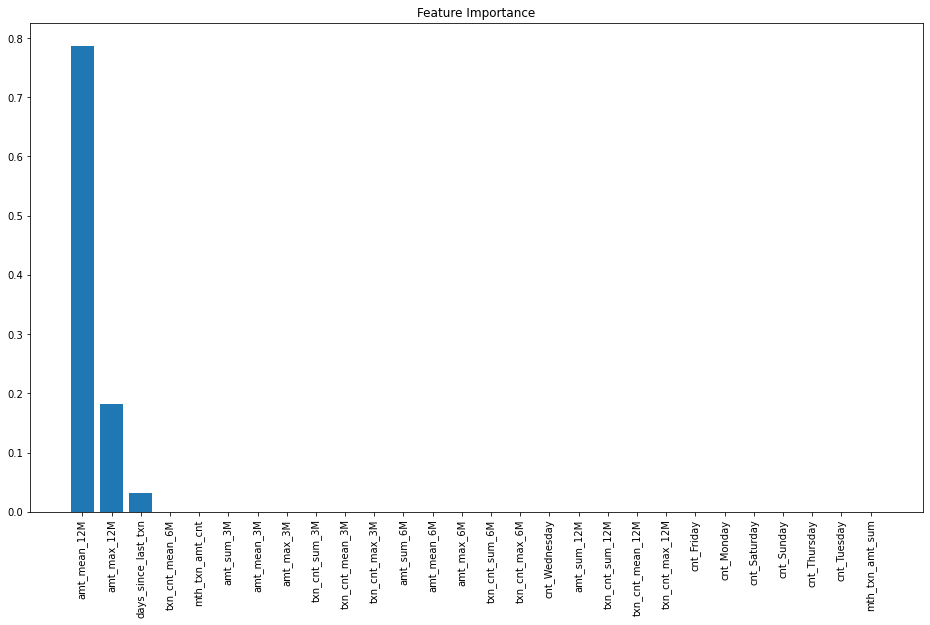

In [41]:
#Sterp 5: Plot coefficient values or feature importance.
import matplotlib.pyplot as plt
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 3)
model_dt_monthly  = estimator.fit(X_train_monthly_scaled, y_train_monthly)
# Calculate feature importances
importances = model_dt_monthly.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_monthly.columns[i] for i in indices]
plt.figure(figsize=(16,9))
plt.title("Feature Importance")
plt.bar(range(X_monthly.shape[1]), importances[indices])
plt.xticks(range(X_monthly.shape[1]), names, rotation=90)
plt.show()

Text(-8.700000000000003, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

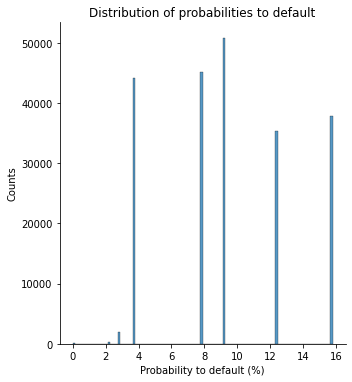

In [42]:
#Step 6: Plot probability distribution for test set.
y_test_proba = model_dt_monthly.predict_proba(X_test_monthly_scaled)
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

[[97742     0]
 [10107     0]]


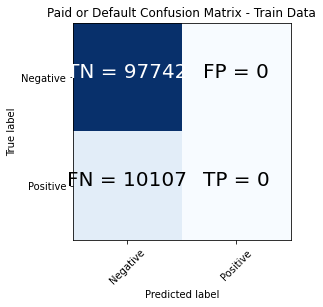

In [43]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
#ROC for train
from sklearn.metrics import confusion_matrix
model_monthly_dt_predicted_train=model_dt_monthly.predict(X_train_monthly_scaled)
cm_train = confusion_matrix(y_train_monthly, model_monthly_dt_predicted_train)
print(cm_train)
plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

[[195397      0]
 [ 20302      0]]


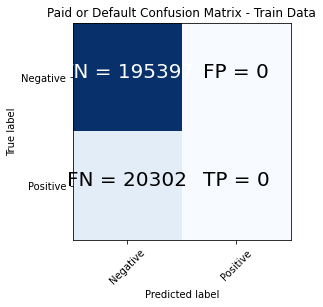

In [44]:
#ROC for Test
from sklearn.metrics import confusion_matrix
model_monthly_dt_predicted_test=model_dt_monthly.predict(X_test_monthly_scaled)
cm_test= confusion_matrix(y_test_monthly, model_monthly_dt_predicted_test)
print(cm_test)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

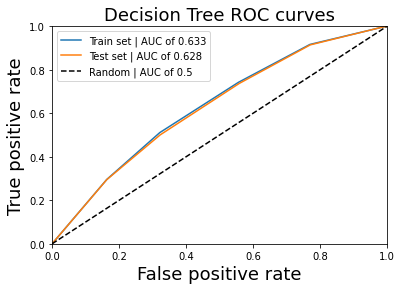

In [45]:
# Scores for train set
scores_train = model_dt_monthly.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = model_dt_monthly.predict_proba(X_test_monthly_scaled)[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_dt_monthly = precision_score(y_test_monthly, model_monthly_dt_predicted_test)
recall_dt_monthly = recall_score(y_test_monthly, model_monthly_dt_predicted_test)
print('The precision Score for the monthly testing is:', precision_dt_monthly*100,'%')
print('The recall Score for the monthly testing is:', recall_dt_monthly*100,'%')

The precision Score for the monthly testing is: 0.0 %
The recall Score for the monthly testing is: 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#Step 8: Plot decision boundary for top 2 features.
print('The top 2 features are', X_monthly.columns[indices[0]],'&',X_monthly.columns[indices[1]])

xx, yy = np.mgrid[0:15:1.5, 0:16:1.6] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_monthly_scaled.shape[1])) * np.median(X_train_monthly_scaled, axis=0) 
median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

The top 2 features are amt_mean_12M & amt_max_12M


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,0.0,0.0,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
1,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,0.0,1.6,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
2,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,0.0,3.2,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
3,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,0.0,4.8,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
4,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,0.0,6.4,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,13.5,8.0,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
96,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,13.5,9.6,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
97,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,13.5,11.2,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
98,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,-0.100876,13.5,12.8,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656


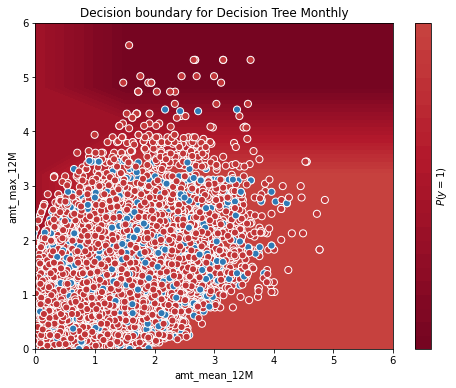

In [48]:
probs = model_dt_monthly.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly_scaled[50:,15], X_train_monthly_scaled[50:, 16], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 6), ylim=(0, 6),
       xlabel="amt_mean_12M", ylabel="amt_max_12M")
plt.title("Decision boundary for Decision Tree Monthly")
plt.show()

#Random Forest

*Random Forest Algorithm for Annual*

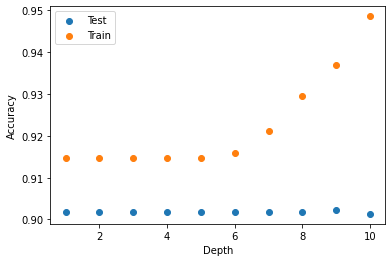

In [49]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.ensemble import RandomForestClassifier
depths_for_RF = list(range(1, 11))
Train_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
Test_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
count = -1
for depth in depths_for_RF:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=80, max_depth=depth, random_state=1)
    # Fit the model
    random_forest_mdl.fit(X_train_annual_scaled, np.ravel(y_train_annual))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_annual_scaled, np.ravel(y_train_annual))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_annual_scaled, np.ravel(y_test_annual))  
plt.scatter(depths_for_RF, Test_Error_RF, label='Test')
plt.scatter(depths_for_RF, Train_Error_RF, label='Train')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

When depth = 9, test has the highest accuracy. So we will pick depth = *9* in following models. 

In [50]:
best_RF_annual = RandomForestClassifier(n_estimators=80, max_depth=9, random_state=1)
# Fit the model
best_RF_annual.fit(X_train_annual_scaled, np.ravel(y_train_annual))
Train_Error_RF = best_RF_annual.score(X_train_annual_scaled, y_train_annual)
Test_Error_RF = best_RF_annual.score(X_test_annual_scaled, y_test_annual)

print('Train Mean Accuracy:', round(Train_Error_RF,2))
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Train Mean Accuracy: 0.94
Test Mean Accuracy: 0.9


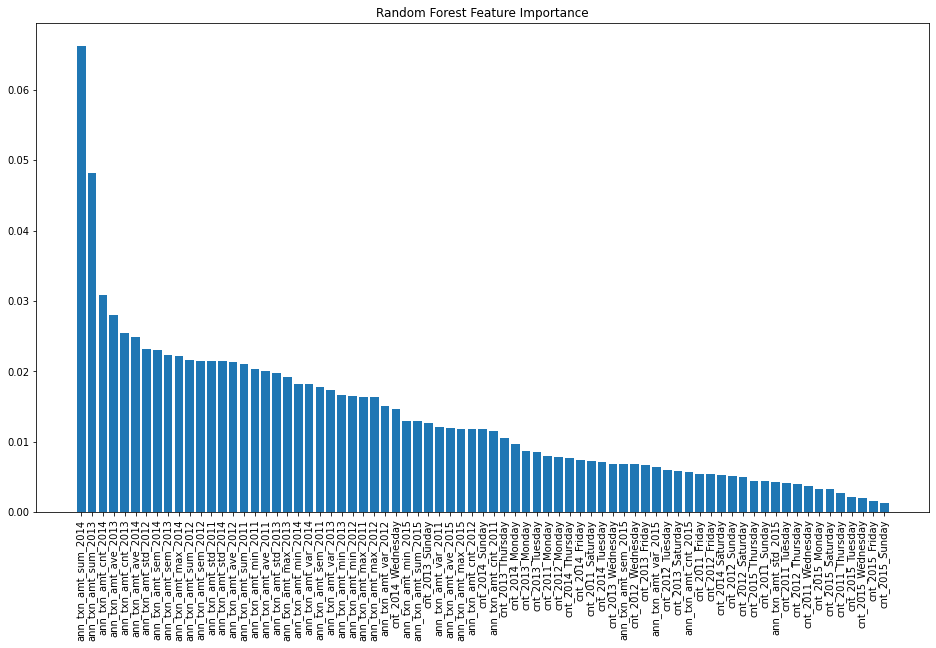

In [51]:
#Sterp 5: Plot coefficient values or feature importance.
importances = best_RF_annual.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_annual.columns [i] for i in indices]
plt.figure(figsize=(16,9))
plt.title("Random Forest Feature Importance")
plt.bar(range(X_annual.shape[1]), importances[indices])
plt.xticks(range(X_annual.shape[1]), names, rotation=90)
plt.show()

Text(3.799999999999997, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

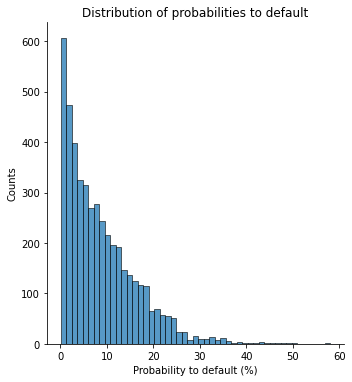

In [52]:
#Step 6: Plot probability distribution for test set.
y_test_proba = best_RF_annual.predict_proba(X_test_annual_scaled)
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

[[2098    0]
 [ 145   51]]


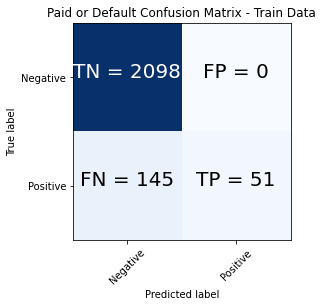

In [53]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
#ROC for train
from sklearn.metrics import confusion_matrix
model_annual_rf_predicted_train=best_RF_annual.predict(X_train_annual_scaled)
cm_train = confusion_matrix(y_train_annual, model_annual_rf_predicted_train)
print(cm_train)
plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

[[4139    0]
 [ 449    2]]


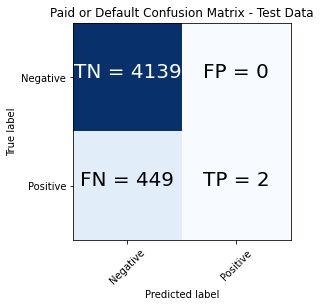

In [54]:
#ROC for Test
from sklearn.metrics import confusion_matrix
model_annual_rf_predicted_test=best_RF_annual.predict(X_test_annual_scaled)
cm_test= confusion_matrix(y_test_annual, model_annual_rf_predicted_test)
print(cm_test)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

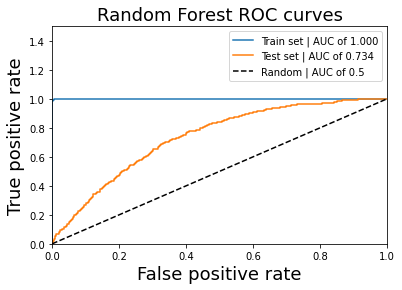

In [55]:
# Scores for train set
scores_train = best_RF_annual.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = best_RF_annual.predict_proba(X_test_annual_scaled)[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.5])
plt.xlim([0,1])
plt.title('Random Forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_rf_annual = precision_score(y_test_annual, model_annual_rf_predicted_test)
recall_rf_annual = recall_score(y_test_annual, model_annual_rf_predicted_test)
print('The precision Score for the annual testing is:', precision_rf_annual*100,'%')
print('The recall Score for the annual testing is:', recall_rf_annual*100,'%')

The precision Score for the annual testing is: 100.0 %
The recall Score for the annual testing is: 0.4434589800443459 %


In [57]:
#Step 8: Plot decision boundary for top 2 features.
print('The top 2 features are', X_annual.columns[indices[0]],'&',X_annual.columns[indices[1]])

xx, yy = np.mgrid[0:33:3.3, 0:32:3.2] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_annual_scaled.shape[1])) * np.median(X_train_annual_scaled, axis=0) 
median_inputs[:,33] = grid[:,0]
median_inputs[:,32] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

The top 2 features are ann_txn_amt_sum_2014 & ann_txn_amt_sum_2013


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.0,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
1,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,3.2,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
2,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,6.4,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
3,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,9.6,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
4,0.207915,0.193815,0.200782,0.20405,0.133991,0.01691,-0.292639,0.096226,-0.315797,0.011929,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,12.8,0.0,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,-0.661907,-0.644811,-0.641415,-0.638052,-0.664721,-0.639065,-0.663574,-0.78488,-0.810012,-0.811448,-0.809837,-0.788426,-0.827614,-0.823126,0.3677,-0.781521,0.348164,-0.804229,-0.806725,0.374833,-0.796034,-0.793866,-0.815301,-0.774711,-0.837012,-0.846345,-0.211053,0.327716,-0.385544,-0.389388,-0.355696,-0.369652,-0.374629,-0.383507,-0.37195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

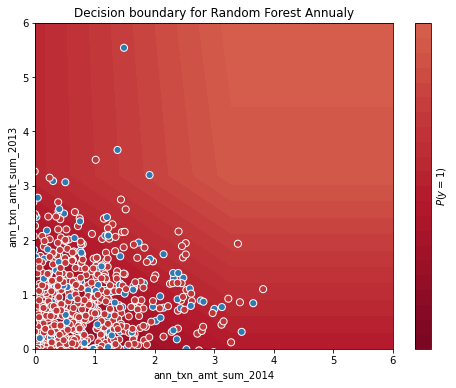

In [58]:
probs = best_RF_annual.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_annual_scaled[50:,33], X_train_annual_scaled[50:, 32], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 6), ylim=(0, 6),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_amt_sum_2013")
plt.title("Decision boundary for Random Forest Annualy")
plt.show()

*Random Forest Algorithm for Monthly*

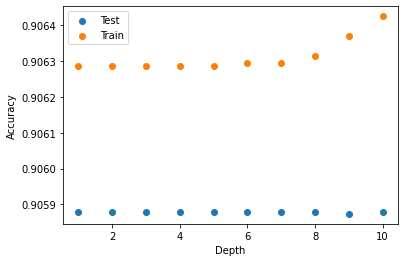

In [59]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method.
from sklearn.ensemble import RandomForestClassifier
depths_for_RF = list(range(1, 11))
Train_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
Test_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
count = -1
for depth in depths_for_RF:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=80, max_depth=depth, random_state=1)
    # Fit the model
    random_forest_mdl.fit(X_train_monthly_scaled, np.ravel(y_train_monthly))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_monthly_scaled, np.ravel(y_train_monthly))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_monthly_scaled, np.ravel(y_test_monthly))
plt.scatter(depths_for_RF, Test_Error_RF, label='Test')
plt.scatter(depths_for_RF, Train_Error_RF, label='Train')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
Test_Error_RF

array([[0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.9058781 ],
       [0.90587346],
       [0.9058781 ]])

Test has the same accuracies no matter the depth. So we will pick depth = 10 in following models. 

In [61]:
best_RF_monthly = RandomForestClassifier(n_estimators=80, max_depth=10, random_state=1)
# Fit the model
best_RF_monthly.fit(X_train_monthly_scaled, np.ravel(y_train_monthly))
Train_Error_RF = best_RF_monthly.score(X_train_monthly_scaled, y_train_monthly)
Test_Error_RF = best_RF_monthly.score(X_test_monthly_scaled, y_test_monthly)

print('Train Mean Accuracy:', round(Train_Error_RF,2))
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Train Mean Accuracy: 0.91
Test Mean Accuracy: 0.91


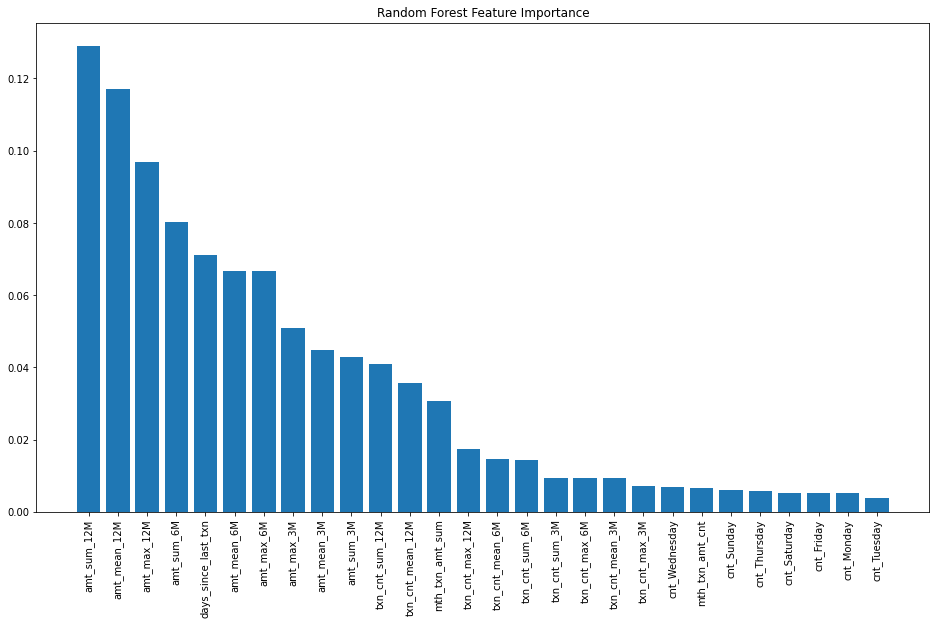

In [62]:
#Sterp 5: Plot coefficient values or feature importance.
importances = best_RF_monthly.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_monthly.columns [i] for i in indices]
plt.figure(figsize=(16,9))
plt.title("Random Forest Feature Importance")
plt.bar(range(X_monthly.shape[1]), importances[indices])
plt.xticks(range(X_monthly.shape[1]), names, rotation=90)
plt.show()

Text(-8.825000000000003, 0.5, 'Counts')

<Figure size 360x360 with 0 Axes>

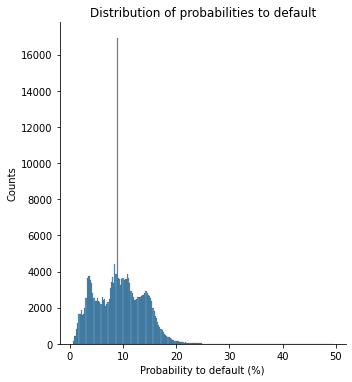

In [63]:
#Step 6: Plot probability distribution for test set.
y_test_proba = best_RF_monthly.predict_proba(X_test_monthly_scaled)
plt.figure(figsize=(5,5))
sns.displot(x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts')

[[97742     0]
 [10092    15]]


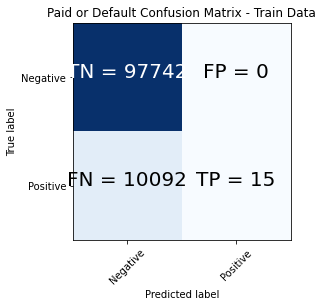

In [64]:
#Step 7: Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
#ROC for train
from sklearn.metrics import confusion_matrix
model_monthly_rf_predicted_train=best_RF_monthly.predict(X_train_monthly_scaled)
cm_train = confusion_matrix(y_train_monthly, model_monthly_rf_predicted_train)
print(cm_train)
plt.clf()
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_train.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_train[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
plt.show()

[[195397      0]
 [ 20302      0]]


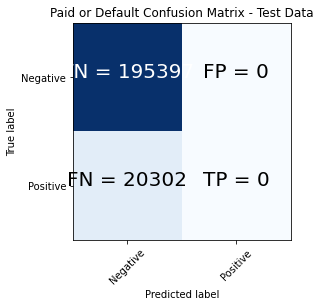

In [65]:
#ROC for Test
from sklearn.metrics import confusion_matrix
model_monthly_rf_predicted_test=best_RF_monthly.predict(X_test_monthly_scaled)
cm_test= confusion_matrix(y_test_monthly, model_monthly_rf_predicted_test)
print(cm_test)
plt.clf()
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Paid or Default Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm_test.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_test[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.show()

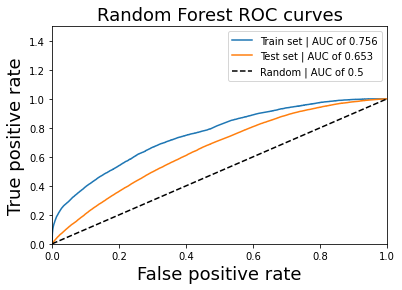

In [66]:
# Scores for train set
scores_train = best_RF_monthly.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = best_RF_monthly.predict_proba(X_test_monthly_scaled)[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.5])
plt.xlim([0,1])
plt.title('Random Forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_rf_monthly = precision_score(y_test_monthly, model_monthly_rf_predicted_test)
recall_rf_monthly = recall_score(y_test_monthly, model_monthly_rf_predicted_test)
print('The precision Score for the monthly testing is:', precision_rf_monthly*100,'%')
print('The recall Score for the monthly testing is:', recall_rf_monthly*100,'%')

The precision Score for the monthly testing is: 0.0 %
The recall Score for the monthly testing is: 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#Step 8: Plot decision boundary for top 2 features.
print('The top 2 features are', X_monthly.columns[indices[0]],'&',X_monthly.columns[indices[1]])

xx, yy = np.mgrid[0:14:1.4, 0:15:1.5] # create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
median_inputs = np.ones((100, X_train_monthly_scaled.shape[1])) * np.median(X_train_monthly_scaled, axis=0) 
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

The top 2 features are amt_sum_12M & amt_mean_12M


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,0.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
1,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,1.5,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
2,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,3.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
3,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,4.5,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
4,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,0.0,6.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,12.6,7.5,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
96,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,12.6,9.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
97,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,12.6,10.5,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656
98,-0.578192,-0.619462,-0.193239,-0.193239,-0.024957,-0.11418,-0.11418,0.213781,-0.16898,-0.16898,-0.011967,-0.066397,-0.066397,-0.156947,12.6,12.0,0.01306,0.132336,0.132336,-0.251649,-0.231985,-0.234735,-0.235245,-0.233869,-0.234524,-0.235702,-0.235727,-0.331656


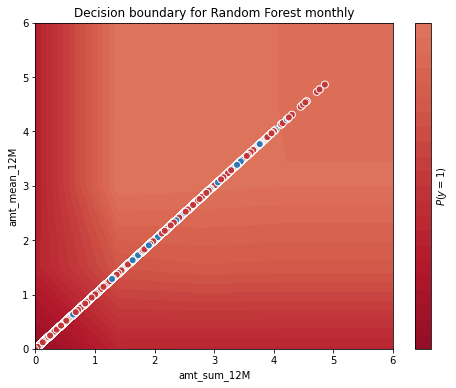

In [69]:
probs = best_RF_monthly.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_train_monthly_scaled[50:,14], X_train_monthly_scaled[50:, 15], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(0, 6), ylim=(0, 6),
       xlabel="amt_sum_12M", ylabel="amt_mean_12M")
plt.title("Decision boundary for Random Forest monthly")
plt.show()

**1.3 Comparison of methods (10 points)**

Compare the two feature engineering (annual and monthly) and the three modeling approaches (L1 log-reg, tree, forests) in terms of the outcomes of steps 5-8. Which combination of feature engineering and modeling approach do you select as the best to deploy in a
production environment and why? Tabularize your findings in steps 5-8 to summarize the
results and support your decision (how to organize information with tables in Markdown).

In [86]:
comparison_table_annual=pd.DataFrame(data=[recall_lr_annual,recall_dt_annual,recall_rf_annual],
                              columns=['Recall'],index=['L1 Logistic Regression','Decision Tree','Random Forest'])
comparison_table_annual['Precision']=[precision_lr_annual,precision_dt_annual,precision_rf_annual]
comparison_table_annual['TN']=['4102','4139','4139']
comparison_table_annual['TP']=['12','0','2']
comparison_table_annual['Test AUC']=['0.734','0.726','0.734']
comparison_table_annual['Top 2 Features']=['14&32','33&32','33&32']
comparison_table_annual['Distribution']=['Right-skewed','Most people have 12% positive respond','right-skewed']
comparison_table_annual

,Recall,Precision,TN,TP,Test AUC,Top 2 Features,Distribution
L1 Logistic Regression,0.026608,0.244898,4102,12,0.734,14&32,Right-skewed
Decision Tree,0.000000,0.000000,4139,0,0.726,33&32,Most people have 12% positive respond
Random Forest,0.004435,1.000000,4139,2,0.734,33&32,right-skewed


In [87]:
comparison_table_monthly=pd.DataFrame(data=[recall_lr_monthly,recall_dt_monthly,recall_rf_monthly],
                              columns=['Recall'],index=['L1 Logistic Regression','Decision Tree','Random Forest'])
comparison_table_monthly['Precision']=[precision_lr_monthly,precision_dt_monthly,precision_rf_monthly]
comparison_table_monthly['TN']=['19539','19539','19539']
comparison_table_monthly['TP']=['0','0','0']
comparison_table_monthly['Test AUC']=['0.626','0.628','0.653']
comparison_table_monthly['Top 2 Features']=['14&15','15&16','14&15']
comparison_table_monthly['Distribution']=['Right-skewed','Less than 16% positive respond','slightlt right-skewed,most people have 10% positive respond']
comparison_table_monthly

,Recall,Precision,TN,TP,Test AUC,Top 2 Features,Distribution
L1 Logistic Regression,0.0,0.0,19539,0,0.626,14&15,Right-skewed
Decision Tree,0.0,0.0,19539,0,0.628,15&16,Less than 16% positive respond
Random Forest,0.0,0.0,19539,0,0.653,14&15,"slightlt right-skewed,most people have 10% pos..."


We will compare the test recall for each algorithm and feature. All algorithm with both features have low recall values, which may be caused by the unbalanced dataset, and the models can not predict accuratly. 

Since we would like to avoid FN, which is people who have positive responds not receiving promotions. For feature annual, L1 Logistic Regression has the highest recall value and relatively high precision. The test AUC for L1 Logistic Regression is high as well. Therefore, we will consider L1 Logistic Regression model as the best model here. 

For the monthly data, I probably ruined the original dataset in last Assignment, or I probably fit the wrong models, or due to the large amount of data and features, the precision and recall are all 0. However, from the result I got, we can roughly conclude that Random Forest has the highest AUC, and the most important features should be 14 and 15: amt_sum_12M & amt_mean_12M



